![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39119455-2f3eb97a-46ec-11e8-811d-04a491229648.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Reading MultiIndexes

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/nba_2017.csv')

In [3]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines,SG,23,OKC,68,6,1055,134,341,...,0.898,18,68,86,40,37,8,33,114,406
1,2,Quincy Acy,PF,26,TOT,38,1,558,70,170,...,0.750,20,95,115,18,14,15,21,67,222
2,2,Quincy Acy,PF,26,DAL,6,0,48,5,17,...,0.667,2,6,8,0,0,0,2,9,13
3,2,Quincy Acy,PF,26,BRK,32,1,510,65,153,...,0.754,18,89,107,18,14,15,19,58,209
4,3,Steven Adams,C,23,OKC,80,80,2389,374,655,...,0.611,281,332,613,86,89,78,146,195,905


In [4]:
df.shape

(595, 30)

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

### Cleaning it before proceeding

In [5]:
df['Tm'].value_counts().sort_index()

ATL    20
BOS    15
BRK    21
CHI    18
CHO    19
CLE    21
DAL    24
DEN    19
DET    15
GSW    17
HOU    18
IND    16
LAC    15
LAL    18
MEM    17
MIA    15
MIL    19
MIN    16
NOP    26
NYK    16
OKC    19
ORL    19
PHI    21
PHO    18
POR    15
SAC    19
SAS    16
TOR    17
TOT    53
UTA    15
WAS    18
Name: Tm, dtype: int64

🤔 Seems like there's a team `TOT` with **53(!)** players. It's probably [an aggregation](https://www.reddit.com/r/nba/comments/7lt7qz/what_does_tot_mean_on_basketballreferencecom/).

In [6]:
df[df['Tm'] == 'TOT'].head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,2,Quincy Acy,PF,26,TOT,38,1,558,70,170,...,0.750,20,95,115,18,14,15,21,67,222
14,13,Justin Anderson,SF,23,TOT,75,10,1228,186,439,...,0.791,69,176,245,66,41,23,66,109,532
32,29,Matt Barnes,SF,36,TOT,74,18,1777,185,473,...,0.787,70,314,384,195,48,26,107,185,527
55,50,Bojan Bogdanovic,SF,27,TOT,81,54,2083,376,845,...,0.893,37,240,277,111,34,7,131,146,1113
58,51,Andrew Bogut,C,32,TOT,27,21,583,38,81,...,0.273,56,162,218,49,13,25,43,86,79


In [7]:
len(df[df['Tm'] == 'TOT'])

53

Better drop it:

In [8]:
df.drop(df[df['Tm'] == 'TOT'].index, inplace=True)

In [9]:
len(df)

542

Do we have duplicated players?

In [10]:
df.duplicated(subset=['Player']).values.any()

True

In [11]:
df[df.duplicated(subset=['Player'], keep=False)].head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,2,Quincy Acy,PF,26,DAL,6,0,48,5,17,...,0.667,2,6,8,0,0,0,2,9,13
3,2,Quincy Acy,PF,26,BRK,32,1,510,65,153,...,0.754,18,89,107,18,14,15,19,58,209
15,13,Justin Anderson,SF,23,DAL,51,2,710,111,277,...,0.795,39,110,149,32,28,16,40,64,329
16,13,Justin Anderson,SF,23,PHI,24,8,518,75,162,...,0.780,30,66,96,34,13,7,26,45,203
33,29,Matt Barnes,SF,36,SAC,54,13,1367,147,383,...,0.758,55,238,293,150,36,17,83,138,413


Players that played in two teams during the same season. Better drop at least one to play it safe:

In [12]:
df.drop_duplicates(subset=['Player'], inplace=True)

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

### Creating a MultiIndex

It's as simple as setting the index of our DataFrame with multiple columns:

In [13]:
df.set_index(['Tm', 'Player'], inplace=True)

In [14]:
df.sort_index(inplace=True)

In [15]:
df.head()

Rk Pos  Age   G  GS    MP   FG   FGA    FG%   3P  ...   \
Tm  Player                                                              ...    
ATL DeAndre' Bembry   40  SF   22  38   1   371   47    98  0.480    1  ...    
    Dennis Schroder  394  PG   23  79  78  2485  548  1214  0.451  100  ...    
    Dwight Howard    205   C   31  74  74  2199  388   613  0.633    0  ...    
    Edy Tavares      418   C   24   1   0     4    1     1  1.000    0  ...    
    Gary Neal        323  SG   32   2   0    18    0     7  0.000    0  ...    

                       FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
Tm  Player                                                                
ATL DeAndre' Bembry  0.375   14   45   59   28    8    5   16   21   101  
    Dennis Schroder  0.855   42  206  248  499   74   16  258  149  1414  
    Dwight Howard    0.533  296  644  940  104   64   92  170  203  1002  
    Edy Tavares      0.000    0    1    1    0    0    0    0    0     2  
    Gary Neal        1.000    0    1    1    1    0    0    0    1     4  

[5 rows x 28 columns]

In [16]:
df.loc['GSW']

,Rk,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Anderson Varejao,443,C,34,14,1,92,5,14,0.357,0,...,0.727,12,15,27,10,3,3,8,16,18
Andre Iguodala,211,SF,33,76,0,1998,219,415,0.528,64,...,0.706,51,253,304,261,76,39,58,97,574
Briante Weber,456,PG,24,7,0,46,5,14,0.357,0,...,0.667,0,4,4,5,3,1,3,4,12
Damian Jones,235,C,21,10,0,85,8,16,0.500,0,...,0.300,9,14,23,0,1,4,6,15,19
David West,457,C,36,68,0,854,135,252,0.536,3,...,0.768,47,156,203,151,42,48,78,105,316
Draymond Green,164,PF,26,76,76,2471,272,650,0.418,81,...,0.709,98,501,599,533,154,106,184,217,776
Ian Clark,82,SG,25,77,0,1137,211,433,0.487,61,...,0.759,22,99,121,90,39,8,55,77,527
JaVale McGee,293,C,29,77,10,739,208,319,0.652,0,...,0.505,100,144,244,17,19,67,40,109,472
James Michael McAdoo,286,PF,24,52,2,457,62,117,0.530,2,...,0.500,34,57,91,18,18,29,19,47,147


In [17]:
df.loc['GSW', 'Stephen Curry']

Rk         98
Pos        PG
Age        28
G          79
GS         79
MP       2638
FG        675
FGA      1443
FG%     0.468
3P        324
3PA       789
3P%     0.411
2P        351
2PA       654
2P%     0.537
eFG%     0.58
FT        325
FTA       362
FT%     0.898
ORB        61
DRB       292
TRB       353
AST       524
STL       142
BLK        17
TOV       239
PF        183
PTS      1999
Name: (GSW, Stephen Curry), dtype: object

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

### Summary Stats

In [18]:
df.sum(level='Tm')

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Tm,,,,,,,,,,,,,,,,,,,,,
ATL,4611,464,806,396,18527,2950,6505,7.209,656,1938,...,12.141,780,2604,3384,1828,637,384,1186,1369,7959
BOS,4062,379,892,410,19754,3168,6978,7.090,985,2742,...,10.733,744,2698,3442,2069,617,340,1037,1686,8857
BRK,3716,444,845,409,18656,2944,6638,7.276,824,2445,...,12.762,683,2703,3386,1703,558,358,1249,1618,8213
CHI,3857,388,836,409,19308,3099,6957,6.143,600,1763,...,10.759,976,2733,3709,1811,630,393,1036,1425,8251
CHO,4609,415,801,410,19462,3051,6915,6.628,822,2337,...,11.753,694,2808,3502,1868,555,386,883,1317,8502
CLE,3990,483,783,405,18084,3019,6436,6.782,927,2474,...,11.977,751,2627,3378,1722,517,305,996,1352,8334
DAL,3626,569,852,369,18226,2746,6265,8.251,818,2323,...,13.771,581,2326,2907,1530,550,276,843,1430,7425
DEN,3525,428,809,400,19113,3276,7010,8.128,870,2364,...,13.023,915,2713,3628,2006,549,292,1139,1487,8912
DET,3074,382,850,410,19806,3269,7282,6.298,631,1915,...,11.518,908,2838,3746,1732,574,310,932,1467,8309


In [19]:
df['FG'].sum(level='Tm')

Tm
ATL    2950
BOS    3168
BRK    2944
CHI    3099
CHO    3051
CLE    3019
DAL    2746
DEN    3276
DET    3269
GSW    3494
HOU    3181
IND    3203
LAC    3242
LAL    3106
MEM    2964
MIA    3202
MIL    3152
MIN    3206
NOP    3025
NYK    3216
OKC    2946
ORL    3020
PHI    2728
PHO    3270
POR    3123
SAC    2862
SAS    3222
TOR    3031
UTA    3033
WAS    3252
Name: FG, dtype: int64

In [20]:
total_points_per_team = df['FG'].sum(level='Tm')

In [21]:
total_points_per_team

Tm
ATL    2950
BOS    3168
BRK    2944
CHI    3099
CHO    3051
CLE    3019
DAL    2746
DEN    3276
DET    3269
GSW    3494
HOU    3181
IND    3203
LAC    3242
LAL    3106
MEM    2964
MIA    3202
MIL    3152
MIN    3206
NOP    3025
NYK    3216
OKC    2946
ORL    3020
PHI    2728
PHO    3270
POR    3123
SAC    2862
SAS    3222
TOR    3031
UTA    3033
WAS    3252
Name: FG, dtype: int64

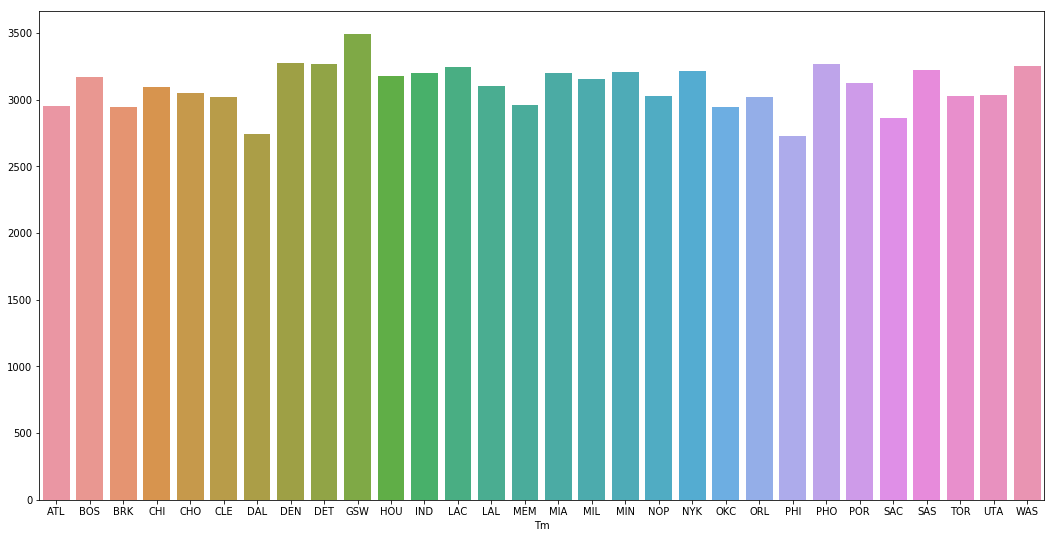

In [22]:
fig, ax = plt.subplots(figsize=(18, 9))

sns.barplot(total_points_per_team.index, total_points_per_team.values, ax=ax)

**But, how can we create more complex aggregations?**

We'll explore it in our next lesson. For now, let's export our cleaned Dataset:

In [23]:
new_df = df.reset_index()

In [24]:
#new_df.to_csv('data/nba_2017_cleaned.csv', index=False)

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)